In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor
from pathlib import Path
import json

__rows = 1
__cols = 1


def sb_init( cols, rows):
    fig = plt.figure(figsize=[cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    plt.subplot(rows, cols, 1)
    return fig


def sb(x, y):
    return plt.subplot(__rows, __cols, x + (y - 1) * __cols)

## Jamming density studies

In [ ]:
# Load data

p = Path('Jamming/')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

def load( filename ):
    text = filename.read_text()
    text = text.replace("nan","0")
    text = text.replace("False", "false" )
    text = text.replace("True", "true" )
    return json.loads( text )

for d in dirs:
    item = {}
    item.update( load( d / 'details.txt'     ) )
    item.update( load( d / 'deposition.txt'  ) )
    item.update( load( d / 'percolation.txt' ) )
    data.append(item)

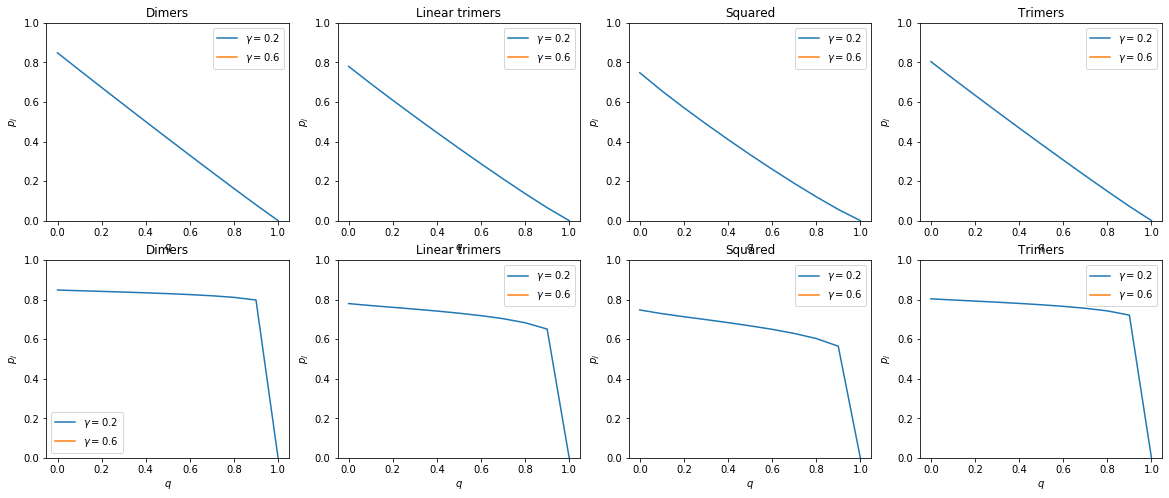

In [ ]:
# Jamming density and normalized jamming density as function of gamma at different q

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

polys = np.unique(  [i['dep_polymers'] for i in data] )
gammas = np.unique( [i['gamma'] for i in data]        )
sides = np.unique(  [i['side'] for i in data]         )

assert( sides.size == 1 )

fig = sb_init( len( polys ), 2 )

ylims_1 = [ 0, 1 ]
ylims_2 = [ 0, 1 ]

for i_p, p in enumerate( polys ):
    axes = sb( i_p+1, 1 )
    for i_gamma, gamma in enumerate( gammas ):
        x = np.array([ v['defects_frac']                for v in data if v['dep_polymers'] == p and  v['gamma'] == gamma ])
        y = np.array([ v['occupation_fraction_average'] for v in data if v['dep_polymers'] == p and  v['gamma'] == gamma ])
        sort_idx = np.argsort( x )
        plt.plot( x[sort_idx], y[sort_idx], color=color_list[ i_gamma ], label= r'$\gamma=$' + str(gamma) )
    plt.title( p )
    plt.legend()
    plt.xlabel(r'$q$')
    plt.ylabel(r'$p_j$')
    plt.ylim( ylims_1 )

    axes = sb( i_p+1, 2 )
    for i_gamma, gamma in enumerate( gammas ):
        x = np.array([ v['defects_frac']          for v in data if v['dep_polymers'] == p and  v['gamma'] == gamma ])
        y = np.array([ v['pj_over_1_minus_q_avg'] for v in data if v['dep_polymers'] == p and  v['gamma'] == gamma ])
        sort_idx = np.argsort( x )
        plt.plot( x[sort_idx], y[sort_idx], color=color_list[ i_gamma ], label= r'$\gamma=$' + str(gamma) )
    plt.title( p )
    plt.legend()
    plt.xlabel(r'$q$')
    plt.ylabel(r'$p_j$')
    plt.ylim( ylims_1 )

# plt.savefig('size_scan.png', bbox_inches='tight')
# plt.savefig('size_scan.pdf', bbox_inches='tight')

##  Critical exponent studies

In [35]:
# Load data

p = Path('CriticalExpo/')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

def load( filename ):
    text = filename.read_text()
    text = text.replace("nan","0")
    text = text.replace("False", "false" )
    text = text.replace("True", "true" )
    return json.loads( text )

for d in dirs:
    item = {}
    item.update( load( d / 'details.txt'     ) )
    item.update( load( d / 'deposition.txt'  ) )
    item.update( load( d / 'percolation.txt' ) )
    item['path'] = d
    data.append(item)

In [37]:
for v in data:
    if v['dep_polymers'] == "Dimers" and  v['defects_frac'] == 0.1 and  v['gamma'] == 0.2 and v['side'] == 512:
        print( v )

{'side': 512, 'defects_frac': 0.1, 'gamma': 0.2, 'replies': 1024, 'CF_Model': '', 'dep_polymers': 'Dimers', 'save_path': '20220202_3', 'n_threads': '32', 'draw': False, 'occupation_average': 199389, 'occupation_std': 0, 'occupation_fraction_average': 0.76061, 'occupation_fraction_std': 0, 'pj_over_1_minus_q_avg': 0.845122, 'pj_over_1_minus_q_std': 0, 'defperc_count': 347, 'defperc_avg': 0.338867, 'atmperc_count': 1024, 'atmperc_avg': 1, 'path': WindowsPath('CriticalExpo/20220202_3')}


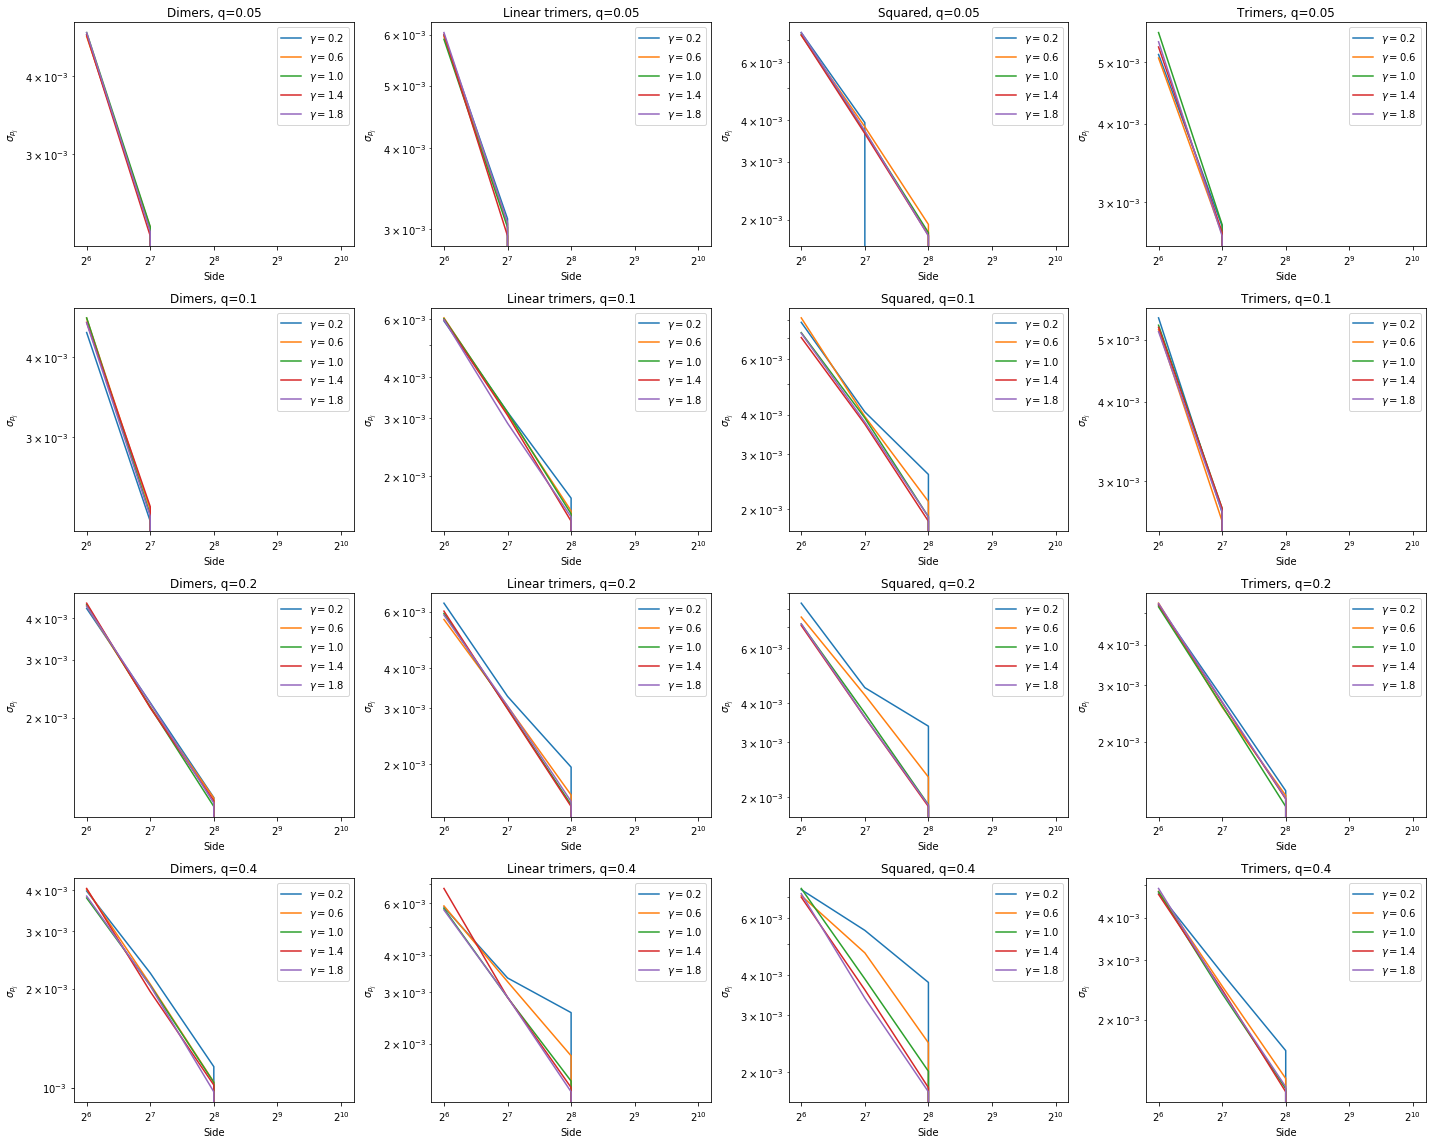

In [33]:
# Jamming density standard deviation as function of L for different values of q and different shapes

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

polys = np.unique(  [i['dep_polymers'] for i in data] )
gammas = np.unique( [i['gamma'] for i in data]        )
qs =     np.unique( [i['defects_frac'] for i in data] )
sides =  np.unique( [i['side'] for i in data] )

fig = sb_init( len( polys ), len( qs ) )

ylims_1 = [ 0, 1 ]
ylims_2 = [ 0, 1 ]

for i_p, p in enumerate( polys ):
    for i_q, q in enumerate( qs ):
        axes = sb( i_p+1, i_q+1 )
        for i_gamma, gamma in enumerate( gammas ):
            x = np.array([ v['side']                    for v in data if v['dep_polymers'] == p and  v['defects_frac'] == q and  v['gamma'] == gamma ])
            y = np.array([ v['occupation_fraction_std'] for v in data if v['dep_polymers'] == p and  v['defects_frac'] == q and  v['gamma'] == gamma ])
            sort_idx = np.argsort( x )
            plt.loglog( x[sort_idx], y[sort_idx], color=color_list[ i_gamma ], label= r'$\gamma=$' + str(gamma), basex = 2, basey = 10 )
        plt.title( p + ", q=" + str(q) )
        plt.legend()
        plt.xlabel(r'Side')
        plt.ylabel(r'$\sigma_{p_j}$')
        plt.xticks( sides )
        # plt.ylim( ylims_1 )

plt.tight_layout() 
# plt.savefig('size_scan.png', bbox_inches='tight')
# plt.savefig('size_scan.pdf', bbox_inches='tight')

## Old stuff

In [23]:
np.unique( [i['defects_frac'] for i in data]        )

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [7]:
data[0]


{'side': 2048,
 'defects_frac': 0,
 'gamma': 0.2,
 'replies': 1024,
 'CF_Model': '',
 'dep_polymers': 'Dimers',
 'save_path': '20220130_0',
 'n_threads': '8',
 'draw': False,
 'occupation_average': 3560090.0,
 'occupation_std': 0,
 'occupation_fraction_average': 0.848791,
 'occupation_fraction_std': 0,
 'pj_over_1_minus_q_avg': 0.848791,
 'pj_over_1_minus_q_std': 0,
 'defperc_count': 0,
 'defperc_avg': 0,
 'atmperc_count': 1024,
 'atmperc_avg': 1}

In [2]:
# Load data

p = Path('./')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

for d in dirs:
    item = {}
    item.update( json.loads( (d / 'details.txt')   .read_text() ) )
    temp = (d / 'deposition.txt')   .read_text()
    temp = temp.replace("nan","0")
    item.update( json.loads( temp ) )
    data.append(item)

In [3]:
data[0]

{'side': 64,
 'defects_frac': 0.2,
 'gamma': 0.2,
 'replies': 100,
 'corr_range': -1,
 'dep_polymers': 'Dimers',
 'occupation_average': 2767.52,
 'occupation_std': 16.4805,
 'occupation_fraction_average': 0.675664,
 'occupation_fraction_std': 0.00402355}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


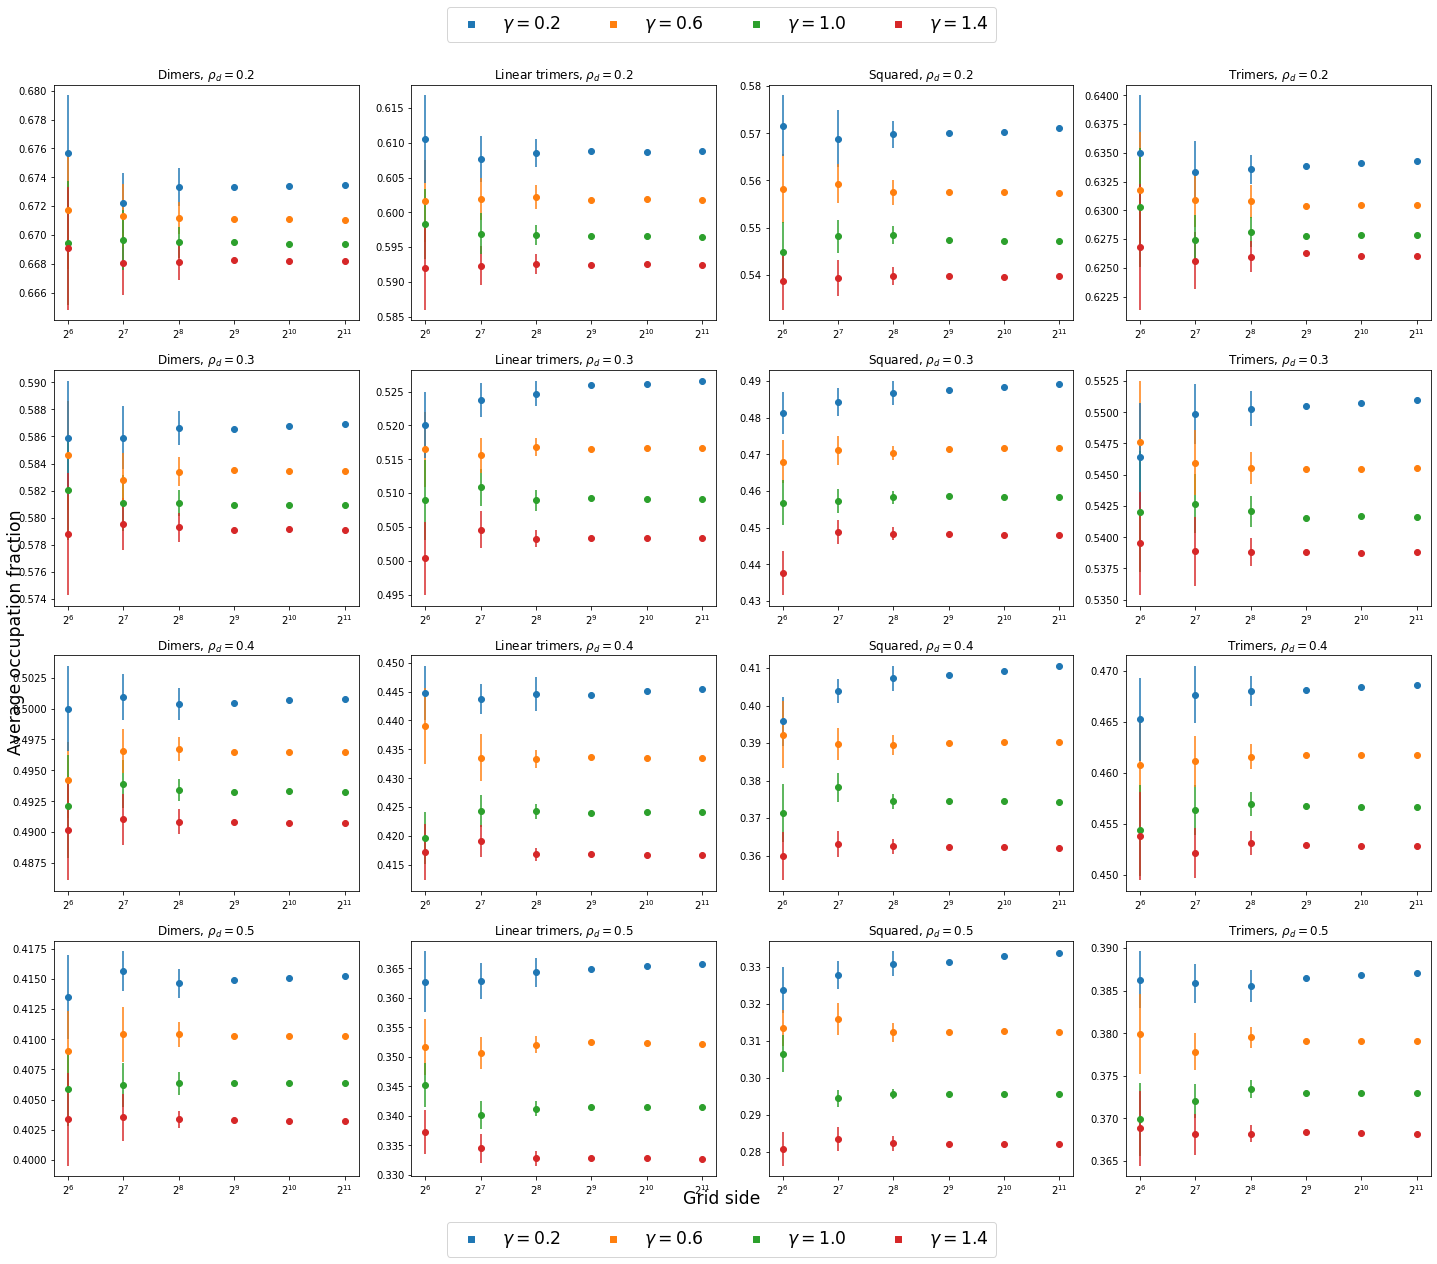

In [60]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
marker_list = ['+','x','*','o']

gammas = np.unique( [i['gamma'] for i in data] ).tolist()
polys = np.unique( [i['dep_polymers'] for i in data] ).tolist()
fracs = np.unique( [i['defects_frac'] for i in data] ).tolist()
sizes = np.unique( [i['side'] for i in data] ).tolist()

fig = sb_init( len( polys ), len( fracs ) )

for i_p, p in enumerate( polys ):
    for i_f, f in enumerate( fracs ):
        axes = sb( i_p+1, i_f+1 )
        current = [ v for v in data if v['dep_polymers'] == p and v['defects_frac'] == f ]
        for cc in current:
            plt.errorbar( cc['side'], cc['occupation_fraction_average'], yerr=cc['occupation_fraction_std'],
                marker = 'o', c= color_list[ gammas.index( cc['gamma'] ) ] )
        plt.xscale( 'log', basex=2 )
        plt.xticks( sizes )
        plt.title( p + r", $\rho_d = $" + str(f) )

fig.text(0.5, 0.004, 'Grid side', ha='center', fontsize='xx-large')
fig.text(0.004, 0.5, 'Average occupation fraction', va='center', rotation='vertical',fontsize='xx-large')

for g in gammas:
    plt.scatter( [], [], c= color_list[ gammas.index( g ) ], marker= 's', label= r"$\gamma =$" + str(g) )
h, l = axes.get_legend_handles_labels()
fig.legend(  h, l, loc = 'upper center', bbox_to_anchor=(0.5, 1.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
fig.legend(  h, l, loc = 'lower center', bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure, ncol=len(h), fontsize='xx-large' )
plt.tight_layout()

plt.savefig('size_scan.png', bbox_inches='tight')
plt.savefig('size_scan.pdf', bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


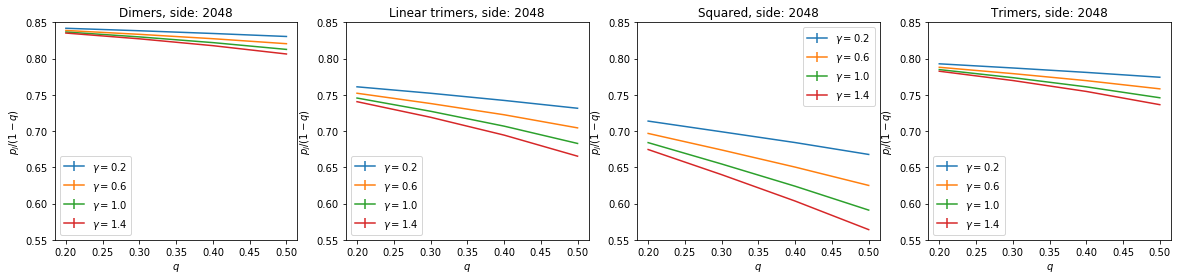

In [25]:
# Jamming density as function of gamma

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

polys = np.unique( [i['dep_polymers'] for i in data] ).tolist()
gammas = np.unique( [i['gamma'] for i in data] ).tolist()
sides = np.unique( [i['side'] for i in data] ).tolist()

fig = sb_init( len( polys ), 1 )

ylims = [0.55, 0.85]

for i_p, p in enumerate( polys ):
    axes = sb( i_p+1, 1 )
    for gamma in gammas:
        x = np.array([ v['defects_frac'] for v in data if v['dep_polymers'] == p and v['side'] == max(sides) and  v['gamma'] == gamma ])
        y = np.array([ v['occupation_fraction_average'] for v in data if v['dep_polymers'] == p and v['side'] == max(sides) and  v['gamma'] == gamma ])
        erry = np.array([ v['occupation_fraction_std'] for v in data if v['dep_polymers'] == p and v['side'] == max(sides) and  v['gamma'] == gamma ])
        y = y / ( 1 - x )
        erry = erry / ( 1 - x )
        sort_idx = np.argsort( x )
        plt.errorbar( x[sort_idx], y[sort_idx], erry[sort_idx], label= r'$\gamma=$' + str(gamma) )
    plt.title( p + ", side: " + str( max(sides) ) )
    plt.legend()
    plt.xlabel(r'$q$')
    plt.ylabel(r'$p_j / (1-q)$')
    plt.ylim( ylims )

# plt.savefig('size_scan.png', bbox_inches='tight')
# plt.savefig('size_scan.pdf', bbox_inches='tight')